In [ ]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('/content/heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


**Checking the shape of data and Overview**

---



In [ ]:
#the missing values in our Dataset
dataset_null=dataset.isnull().sum()
dataset_null

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#check the variables type
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.shape

(1025, 14)

## **Data Normalization **

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Select only numerical columns
numerical_columns = dataset.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
# Fit and transform the data
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])
# Display the normalized DataFrame
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667,1.0
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000,0.0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667,0.0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667,1.0


In [ ]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Data visualization**

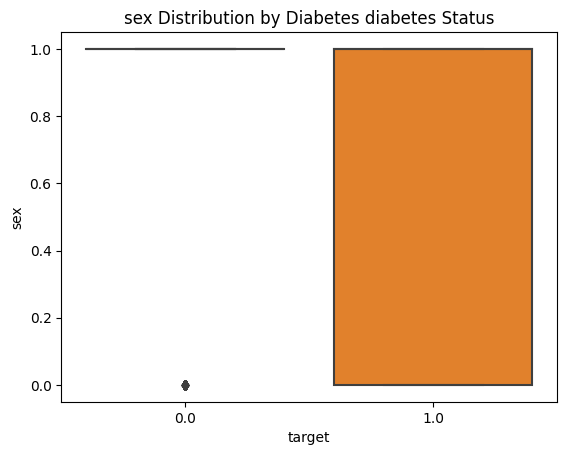

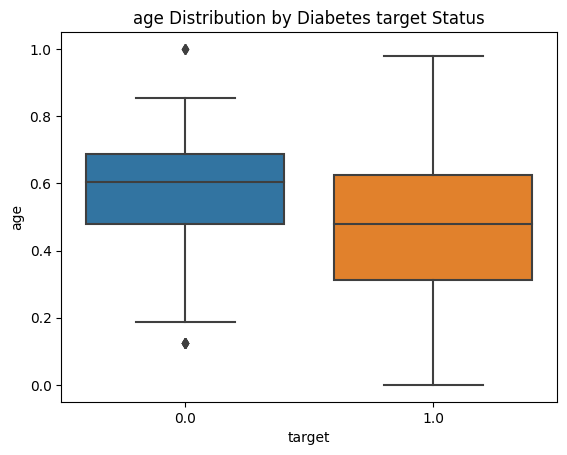

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


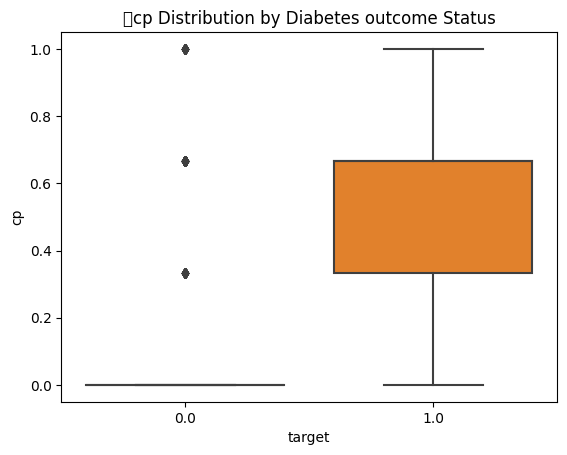

In [ ]:
#Highlighting The major factors that causes diabetes using boxplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="target", y="sex", data=dataset)
plt.title("sex Distribution by Diabetes diabetes Status")
plt.show()
sns.boxplot(x="target", y="age", data=dataset)
plt.title("age Distribution by Diabetes target Status")
plt.show()
sns.boxplot(x="target", y="cp", data=dataset)
plt.title("	cp Distribution by Diabetes outcome Status")
plt.show()


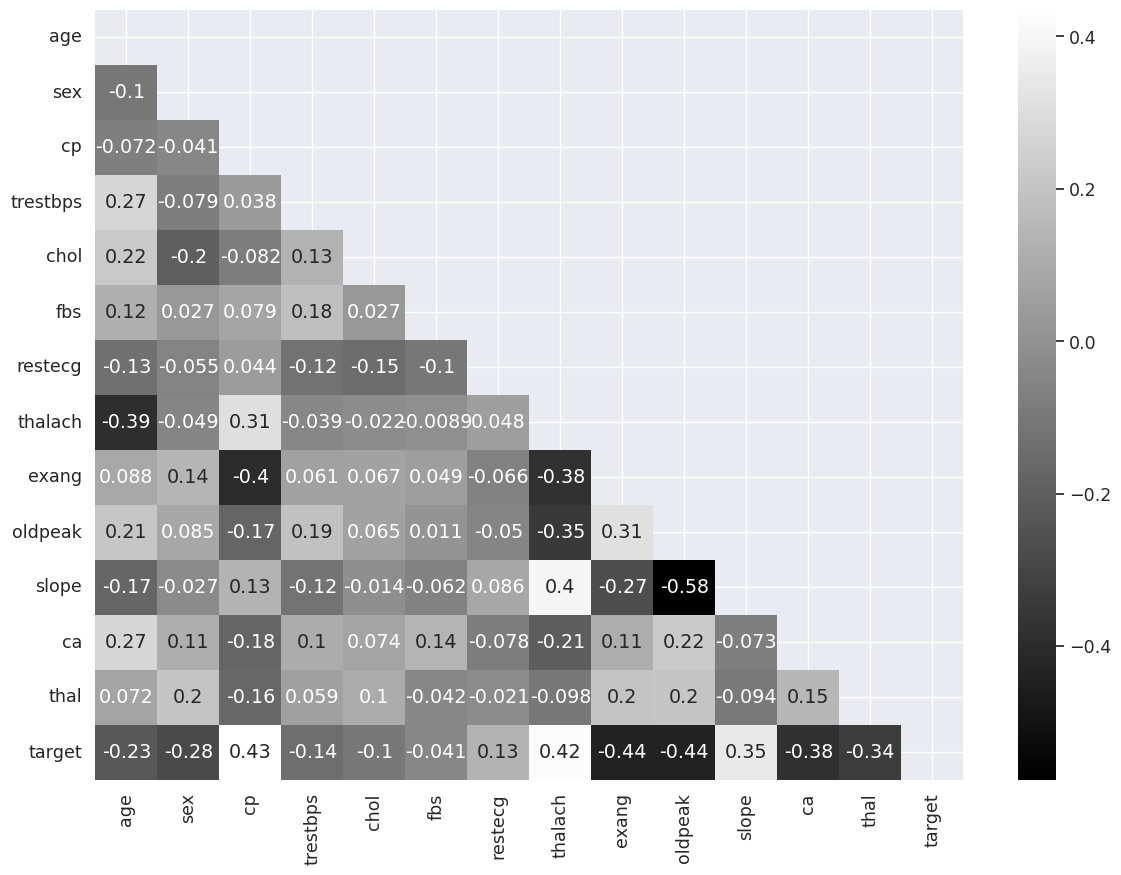

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
crr = dataset.corr()
mask = np.zeros_like(crr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(crr, annot = True, linecolor = "red",cmap='gist_yarg_r', mask=mask ,cbar=True)
plt.show()

In [ ]:
columns=dataset.columns

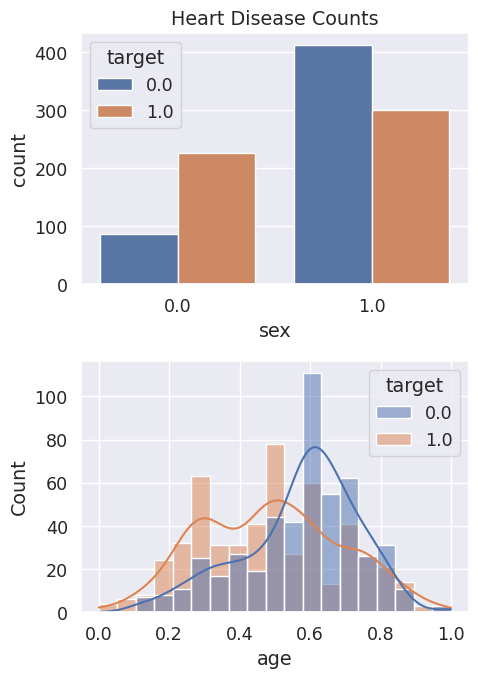

In [ ]:
fig, ax = plt.subplots(2,1,figsize = (5,7))
ax[0] = sns.countplot(ax = ax[0], data = dataset, x = 'sex', hue = 'target')
ax[0].set(title = 'Heart Disease Counts')

ax[1] = sns.histplot(ax = ax[1], x = dataset["age"], hue = dataset['target'], kde = True)#.tick_params(axis = 'x', rotation = 90)


plt.tight_layout()

IndexError: ignored

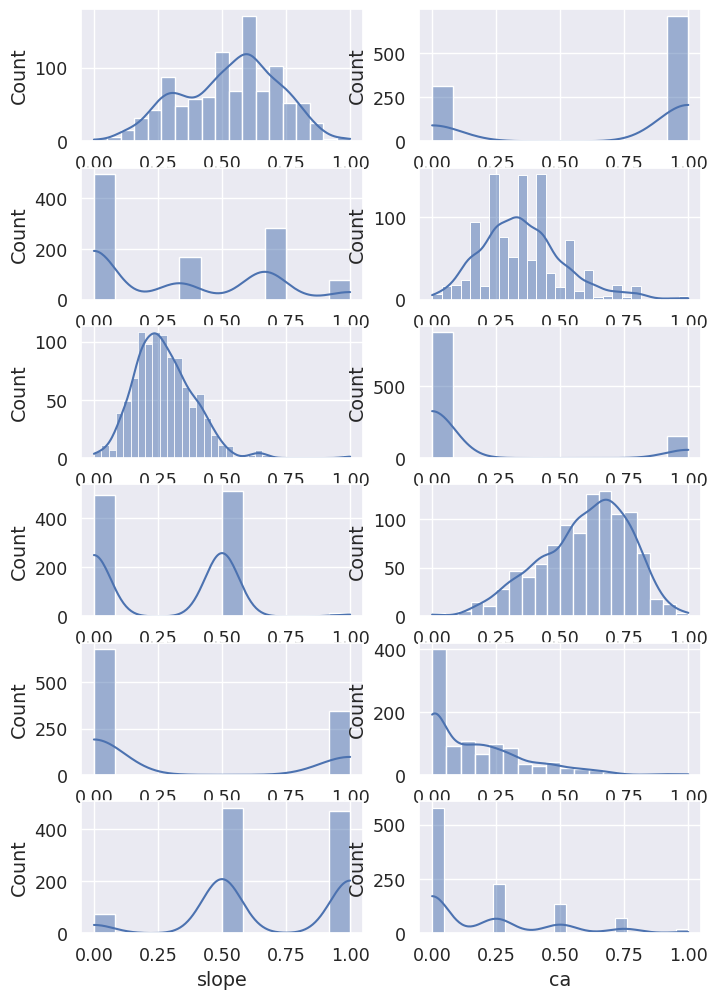

In [ ]:
n_rows = 6
n_columns = 2
fig, ax = plt.subplots(n_rows, n_columns, figsize = (8, 12))

numerical_cols = []

for col in dataset:
    if dataset[col].dtypes != 'O':
        numerical_cols.append(col)

for i, column in enumerate(numerical_cols):
    sns.histplot(ax = ax[i//n_columns, i % n_columns], x = dataset[column], label = column, kde = True)
    #sns.kdeplot(ax = ax[i//n_columns, i % n_columns], x = df[column], label = column, fill = True, hue = df['HeartDisease'])

plt.tight_layout()

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset.iloc[:,0:-1],dataset.iloc[:,-1],test_size=0.2,random_state=2)

In [ ]:
{'train': X_train.shape, 'test':X_test.shape}

{'train': (820, 13), 'test': (205, 13)}

# Training Data using Decision Tree

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Model = DecisionTreeClassifier()

In [ ]:
Model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = Model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred))

Accuracy of Decision Trees 0.9804878048780488


In [ ]:
confusion_matrix(y_test,y_pred)

array([[101,   4],
       [  0, 100]])

# Prediction Result

In [ ]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Decision Tree Prediction'] = y_pred

In [ ]:
result.sample(10)

,Actual Label,Decision Tree Prediction
641,0.0,0.0
908,0.0,0.0
231,1.0,1.0
456,0.0,0.0
426,1.0,1.0
440,0.0,0.0
886,0.0,0.0
179,0.0,0.0
250,0.0,0.0
99,1.0,1.0


In [ ]:
!pip install joblib

In [ ]:
import joblib
joblib.dump(Model, 'decision_tree_model.joblib')
# Load the model
loaded_model = joblib.load('decision_tree_model.joblib')

In [ ]:
predictions =loaded_model .predict(X_test.iloc[1:10])
binary_predictions = np.round(predictions)
percentage_predictions = (predictions * 100).flatten()
# Print or use the predictions as needed
print("Raw Predictions percentge :", percentage_predictions)
print("Binary Predictions:", binary_predictions)
print("the original target",y_test[1:10])

Raw Predictions percentge : [100.   0.   0. 100. 100.   0.   0. 100. 100.]
Binary Predictions: [1. 0. 0. 1. 1. 0. 0. 1. 1.]
the original target 980    1.0
908    0.0
577    0.0
846    1.0
752    1.0
295    0.0
916    0.0
513    0.0
867    1.0
Name: target, dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print('Accuracy:', round(accuracy, 3) * 100, '%')
print('Recall:', round(recall, 3) * 100, '%')
print('Precision:', round(precision, 3) * 100, '%')
print('F1 Score:', round(f1, 3) * 100, '%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 98.0 %
Recall: 100.0 %
Precision: 96.2 %
F1 Score: 98.0 %
Confusion Matrix:
[[101   4]
 [  0 100]]
